In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Scikit Learn Imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
# Tensorflow Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


In [34]:
# Import Data
data_import = pd.read_csv(".//house_predictions.csv")
print(data_import)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

## Prepare Data

In [35]:
# Create pandas dataframe
house_info = pd.DataFrame(data_import)
house_info.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
# Check for nulls
house_info.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [37]:
# Drop unnecessary columns
house_df = house_info.drop(columns=["guestroom", "prefarea", "furnishingstatus"], axis=1)
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,yes,no,no,yes,2
1,12250000,8960,4,4,4,yes,no,no,yes,3
2,12250000,9960,3,2,2,yes,yes,no,no,2
3,12215000,7500,4,2,2,yes,yes,no,yes,3
4,11410000,7420,4,1,2,yes,yes,no,yes,2


In [38]:
# Convert Yes/No to 1/0 for scaling
converted_house_df = house_df.copy()
converted_house_df[["mainroad", "basement", "hotwaterheating", "airconditioning"]] = converted_house_df[["mainroad", "basement", "hotwaterheating", "airconditioning"]].replace({"yes": 1, "no": 0})
converted_house_df.head()

C:\Users\Scarthicus\AppData\Local\Temp\ipykernel_12636\2219152172.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  converted_house_df[["mainroad", "basement", "hotwaterheating", "airconditioning"]] = converted_house_df[["mainroad", "basement", "hotwaterheating", "airconditioning"]].replace({"yes": 1, "no": 0})


,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,1,0,0,1,2
1,12250000,8960,4,4,4,1,0,0,1,3
2,12250000,9960,3,2,2,1,1,0,0,2
3,12215000,7500,4,2,2,1,1,0,1,3
4,11410000,7420,4,1,2,1,1,0,1,2


In [39]:
# Split X and Y
y = converted_house_df["price"]

x = converted_house_df.copy()
x = x.drop(columns="price")

In [40]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [41]:
# Scale numeric data
scaler = StandardScaler().fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

## Create Models

In [42]:
# Score function
def score_model(y_test, y_predictions):
    r2_score = metrics.r2_score(y_test, y_predictions)
    rmse = metrics.root_mean_squared_error(y_test, y_predictions)
    mse = rmse ** 2
    print(f"R2 score: {r2_score}  Mean Square Error: {mse}  Root Mean Square Error: {rmse}")

In [63]:
# Initial Model - Linear Regression
linear_regression_model = LinearRegression()

linear_regression_model.fit(scaled_x_train, y_train)
lr_model_predictions = linear_regression_model.predict(scaled_x_test)


In [64]:
# Score model
score_model(y_test, lr_model_predictions)

R2 score: 0.6101332275947471  Mean Square Error: 1252183947657.4944  Root Mean Square Error: 1119010.2535980153


In [45]:
# Alternate model - Random Forest
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=4)

random_forest_model.fit(scaled_x_train, y_train)
rf_model_predictions = random_forest_model.predict(scaled_x_test)

In [46]:
# Score model
score_model(y_test, rf_model_predictions)

R2 score: 0.5253645263629891  Mean Square Error: 1524446203533.5771  Root Mean Square Error: 1234684.6575274097


In [47]:
# Alternate model - Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(n_estimators=1000, random_state=4)

gbr_model.fit(scaled_x_train, y_train)
gbr_model_predictions = gbr_model.predict(scaled_x_test)

In [48]:
# Score model
score_model(y_test, gbr_model_predictions)

R2 score: 0.43731582754579  Mean Square Error: 1807243238507.416  Root Mean Square Error: 1344337.4719568803


In [49]:
# Neural network model

# Build the neural network model
nn_model = Sequential([
    Dense(512, activation='linear', input_shape=(scaled_x_train.shape[1],)),
    Dense(256,activation='linear'),
    Dense(256, activation='linear'),
    Dense(128, activation='linear'),
    Dense(64, activation='linear'),
    Dense(1, activation='linear')  # Single output neuron for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# Train the model
nn_model.fit(scaled_x_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200


c:\Users\Scarthicus\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 26071103700992.0000 - val_loss: 25585227137024.0000
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26723464773632.0000 - val_loss: 25581620035584.0000
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26998380429312.0000 - val_loss: 25549351157760.0000
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26886761611264.0000 - val_loss: 25355096162304.0000
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27332123295744.0000 - val_loss: 24604626124800.0000
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24455036272640.0000 - val_loss: 22309037408256.0000
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21026150809600.0000 - val_loss: 18230661873664.0000
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18021246566400.0000 - val_loss: 15418192297984.0000
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14112601931776.0000 - val_loss: 11699370328064.0000
Epoch 10/200

In [50]:
# Evaluate the model
loss = nn_model.evaluate(scaled_x_test, y_test)

# Make predictions
nn_model_predictions = nn_model.predict(scaled_x_test)

# Score model
score_model(y_test, nn_model_predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1417789571072.0000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BF845C80D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R2 score: 0.6188046102580271  Mean Square Error: 1224332981780.1865  Root Mean Square Error: 1106495.8119126284


## Removing additional columns to attempt a more accurate model

In [177]:
# Reduce columns
reduced_x = x.copy()
reduced_x = reduced_x[['area', 'bedrooms', 'bathrooms', 'stories', 'basement', 'airconditioning', 'parking']]

In [178]:
# Split and Scale reduced df
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(reduced_x, y, random_state=4)

scaler_2 = StandardScaler().fit(x_train_2)
scaled_x_train_2 = scaler_2.transform(x_train_2)
scaled_x_test_2 = scaler_2.transform(x_test_2)

In [179]:
# Linear Regression model 2
lr_model_2 = LinearRegression()

lr_model_2.fit(scaled_x_train_2, y_train_2)
lr_model_2_predictions = lr_model_2.predict(scaled_x_test_2)

In [180]:
# Score model
score_model(y_test_2, lr_model_2_predictions)

R2 score: 0.5933443555158762  Mean Square Error: 1306106871087.8218  Root Mean Square Error: 1142850.327509172


In [181]:
# Random Forest model 2
rf_model_2 = RandomForestRegressor(n_estimators=1000, random_state=4)

rf_model_2.fit(scaled_x_train_2, y_train_2)
rf_model_2_predictions = rf_model_2.predict(scaled_x_test_2)

In [182]:
# Score model
score_model(y_test_2, rf_model_2_predictions)

R2 score: 0.5418312807728376  Mean Square Error: 1471557865769.3176  Root Mean Square Error: 1213077.8481900152


In [183]:
# GBR model 2
gbr_model_2 = GradientBoostingRegressor(n_estimators=1000, random_state=4)

gbr_model_2.fit(scaled_x_train_2, y_train_2)
gbr_model_2_predictions = gbr_model_2.predict(scaled_x_test_2)

In [184]:
# Score model
score_model(y_test_2, gbr_model_2_predictions)

R2 score: 0.417923847057344  Mean Square Error: 1869526891282.213  Root Mean Square Error: 1367306.4364955695


In [185]:
# Neural network model 2

# Build the neural network model
nn_model_2 = Sequential([
    Dense(512, activation='linear', input_shape=(scaled_x_train_2.shape[1],)),
    Dense(256,activation='linear'),
    Dense(256, activation='linear'),
    Dense(128, activation='linear'),
    Dense(64, activation='linear'),
    Dense(1, activation='linear')  # Single output neuron for regression
])

# Compile the model
nn_model_2.compile(optimizer='adam', loss='mse')

# Train the model
nn_model_2.fit(scaled_x_train_2, y_train_2, epochs=200, validation_split=0.2)

Epoch 1/200


c:\Users\Scarthicus\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 25609723969536.0000 - val_loss: 25585277468672.0000
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24303586246656.0000 - val_loss: 25583297757184.0000
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25287418970112.0000 - val_loss: 25561854377984.0000
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26142876631040.0000 - val_loss: 25429022867456.0000
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28244938063872.0000 - val_loss: 24840524267520.0000
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24926985650176.0000 - val_loss: 23049780854784.0000
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24474690781184.0000 - val_loss: 18945461452800.0000
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18531041148928.0000 - val_loss: 14680435195904.0000
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14653946068992.0000 - val_loss: 10314250715136.0000
Epoch 10/200

In [186]:
# Evaluate the model
loss = nn_model_2.evaluate(scaled_x_test_2, y_test_2)

# Make predictions
nn_model_2_predictions = nn_model_2.predict(scaled_x_test_2)

# Score model
score_model(y_test_2, nn_model_2_predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1475358621696.0000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
R2 score: 0.5978840284106238  Mean Square Error: 1291526235012.1985  Root Mean Square Error: 1136453.3580451943


## Visualization

In [3]:
# Create df to compare model results
results_dict = {
    "Model" : ["Linear Regression 1", "Linear Regression 2", "Random Forest 1", "Random Forest 2", "Gradient Boosting Regression 1", "Gradient Boosting Regression 2", "Neural Network 1", "Neural Network 2"],
    "R2 Score": [.610, .593, .525, .542, .437, .418, .619, .598]
}
results_df = pd.DataFrame(results_dict)
results_df

,Model,R2 Score
0,Linear Regression 1,0.610
1,Linear Regression 2,0.593
2,Random Forest 1,0.525
3,Random Forest 2,0.542
4,Gradient Boosting Regression 1,0.437
5,Gradient Boosting Regression 2,0.418
6,Neural Network 1,0.619
7,Neural Network 2,0.598


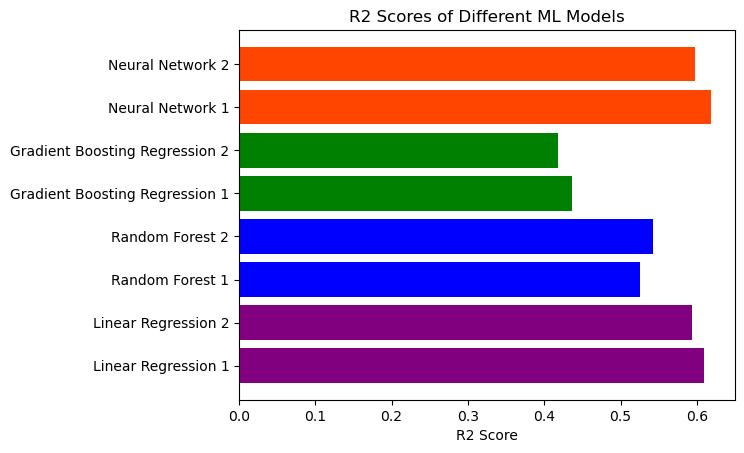

In [ ]:
# Bar chart
colors = ["purple", "purple", "blue", "blue", "green", "green", "orangered", "orangered"]

plt.barh(y=results_df["Model"], width=results_df["R2 Score"], color=colors)
plt.title("R2 Scores of Different ML Models")
plt.xlabel("R2 Score")
plt.show()

In [ ]:
# df ordered by result
ordered_df = results_df.sort_values(by="R2 Score")
ordered_df

,Model,R2 Score
5,Gradient Boosting Regression 2,0.418
4,Gradient Boosting Regression 1,0.437
2,Random Forest 1,0.525
3,Random Forest 2,0.542
1,Linear Regression 2,0.593
7,Neural Network 2,0.598
0,Linear Regression 1,0.610
6,Neural Network 1,0.619


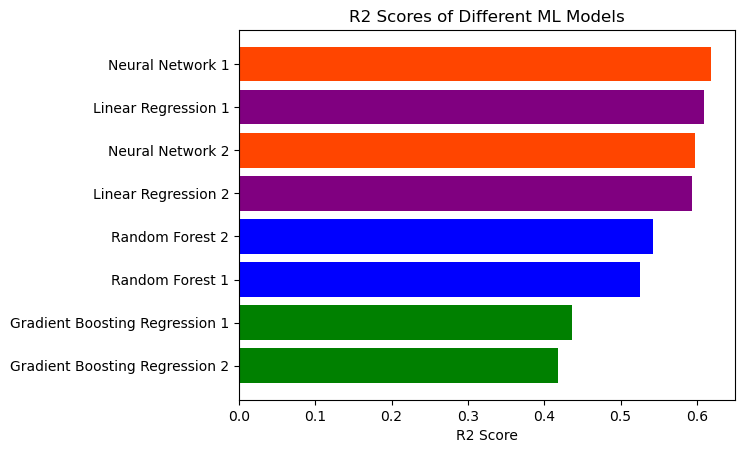

In [ ]:
# Bar chart of results ordered
colors = ["green", "green",  "blue", "blue","purple", "orangered", "purple", "orangered"]
plt.barh(y=ordered_df["Model"], width=ordered_df["R2 Score"], color=colors)
plt.title("R2 Scores of Different ML Models")
plt.xlabel("R2 Score")
plt.show()
